# Redesign
## A program to find α* distribution of a given airfoil using Fourier Coefficients

## Theoritical Derivation

As per the Eqn (9) from Prof. Epplers paprer [1],

$$
\begin{align}
\sum_{m=0}^{\infty} a_m cos(m\phi) + b_m sin(m\phi) = -ln\big[\frac{v(\phi)}{2cos(\frac{\phi}{2} -\alpha)}\big]
\end{align}
$$

By differentiating the equation with respect to $\phi$

$$
\begin{align}
\sum_{m=0}^{\infty} a_m cos(m\phi) + b_m sin(m\phi) = -ln\big[v(\phi)\big] + ln\big[2cos(\frac{\phi}{2} -\alpha)\big]\\
\frac{\partial}{\partial \phi} \sum_{m=0}^{\infty} a_m cos(m\phi) + b_m sin(m\phi) = - \frac{\partial}{\partial \phi} ln\big[v(\phi)\big] + \frac{\partial}{\partial \phi} ln\big[2cos(\frac{\phi}{2} -\alpha)\big]\\
\sum_{m=0}^\infty m b_m cos(m\phi) - m a_m sin(m\phi) = -\frac{v'(\phi)}{v(\phi)} - tan(\frac{\phi}{2} - \alpha)\\
\end{align}
$$

When $\alpha = \alpha^*$, $v'(\phi)$ becomes $0$, hence the second term vanishes away

$$
\begin{align}
\sum_{m=0}^\infty m b_m cos(m\phi) - m a_m sin(m\phi) = - tan(\frac{\phi}{2} - \alpha^*)\\
tan^{-1}\big[\sum_{m=0}^\infty m b_m cos(m\phi) - m a_m sin(m\phi)\big] = \frac{\phi}{2} - \alpha^*\\
\frac{\phi}{2} - tan^{-1}\big[\sum_{m=0}^\infty m b_m cos(m\phi) - m a_m sin(m\phi)\big] = \alpha^*\\
\end{align}
$$

In practice, the Fourier coeifficients that goes in to the program can be generated through **MDES -> Pert** menu in **XFoil**  
This approach generally works on any airfoil, regardless of non-equially spaced phi, camber and thickenss distribution, additional LE points etc, and hence could be considered very flexible. 

## Implementation and Usage

Actual implementation details listed in the Redesign.py file closly follow what is been described above. Functions are heavily commented as well, for the ease of understanding.  
As for the usage; this can be run on a notebook as shown below or on any other python REPL.

In [1]:
from redesign import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

The input file goes in to the program is a list of Furier coeificients [Cn] from Xfoil. For ex:

In [2]:
!type E587.pert

Current mapping coefficients...
       n    Re(Cn)      Im(Cn)
       1    0.965488    0.000010
       2   -0.239280   -0.165005
       3    0.169885    0.074844
       4   -0.089376   -0.126380
       5    0.026908    0.071984
       6   -0.006093   -0.068958
       7   -0.003830    0.051284
       8    0.017655   -0.039186
       9   -0.023022    0.027256
      10    0.021639   -0.014549
      11   -0.023036    0.011598
      12    0.020121    0.000445
      13   -0.018286   -0.000581
      14    0.012873    0.007967
      15   -0.011405   -0.007255
      16    0.005749    0.010218
      17   -0.004412   -0.008744
      18    0.000150    0.009082
      19    0.000610   -0.007253
      20   -0.003155    0.005568
      21    0.002815   -0.004237
      22   -0.003904    0.002531
      23    0.002926   -0.001188
      24   -0.002814    0.000338
      25    0.001563    0.000104
      26   -0.001159   -0.000292
      27    0.000239    0.000018
      28   -0.000187    0.000420
      29   -0

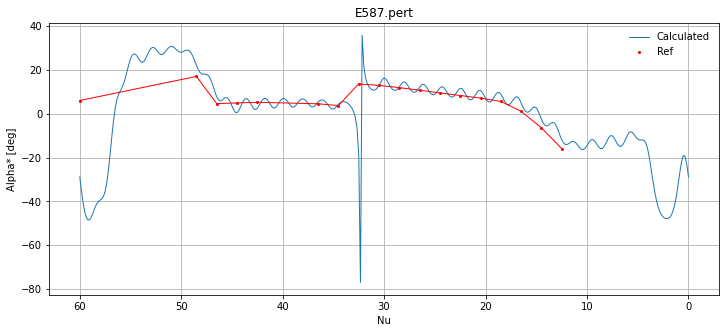

In [3]:
e587_ref =  [[12.5000,-15.92], [14.5000, -6.42], [16.5000,  1.08], [18.5000,  5.58], [20.5000,  7.08], [22.5000,  8.28], 
[24.5000,  9.48], [26.5000, 10.68], [28.5000, 11.88], [30.5000, 12.88], [32.5155, 13.58], [34.5000,  3.70], 
[36.5000,  4.50], [42.5000,  5.20], [44.5000,  4.90], [46.5000,  4.60], [48.5000, 17.00], [60.0000,  6.00]]

r = Redesign("E587.pert", e587_ref)

The above graph shows the calculated $\alpha^*$ destribution of Eppler-587 airfoil.  
Referece line in red shows the actual $\nu - \alpha^*$ destribution which was used to generate the airfoil

## Note

Probably due to the discontiniuety of the harmonic series at the LE, ripples present in the redesigned $\alpha^*$ destribution.  
As per my understanding this cannot easily be overcome given the nature of the $P(\phi)$  
For practical purposes, this should'nt cause too much trouble - a larger phi spacing can be used if required, which mitigates the issue somewhat.  
Any pull request adressing this specific issue is very welcome

## Reference 

[1] Eppler, R., Somers, D.   
A Computer Program for the Design and Analysis of Low Speed Airfoils  
NASA TM-80210, 1980.  